In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import datetime

In [15]:
# load the DataFrame form returns.ipynb
column_names = ["Date", "Close", "High", "Low", "Open", "Volume"]
df = pd.read_csv("aapl_data.csv", skiprows=3, names=column_names, index_col="Date", parse_dates=True)
df.iloc[0]
df.iloc[-1]



Close     1.281230e+02
High      1.281428e+02
Low       1.256578e+02
Open      1.266242e+02
Volume    7.703420e+07
Name: 2022-12-30 00:00:00, dtype: float64

In [16]:
# Fitting the ARIMA model
model = ARIMA(np.log(df['Close']), order=(5, 1, 0))
results_arima = model.fit()
print(results_arima.summary())

c:\Users\jmlud\Desktop\forex\code\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jmlud\Desktop\forex\code\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jmlud\Desktop\forex\code\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  756
Model:                 ARIMA(5, 1, 0)   Log Likelihood                1778.954
Date:                Tue, 14 Oct 2025   AIC                          -3545.909
Time:                        16:02:26   BIC                          -3518.148
Sample:                             0   HQIC                         -3535.215
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1463      0.027     -5.351      0.000      -0.200      -0.093
ar.L2          0.0109      0.025      0.436      0.663      -0.038       0.060
ar.L3         -0.0196      0.032     -0.623      0.5

In [17]:
# predict future values
predictions = results_arima.predict(start=pd.to_datetime('2020-01-02'), end=pd.to_datetime('2022-12-30'), dynamic=False)

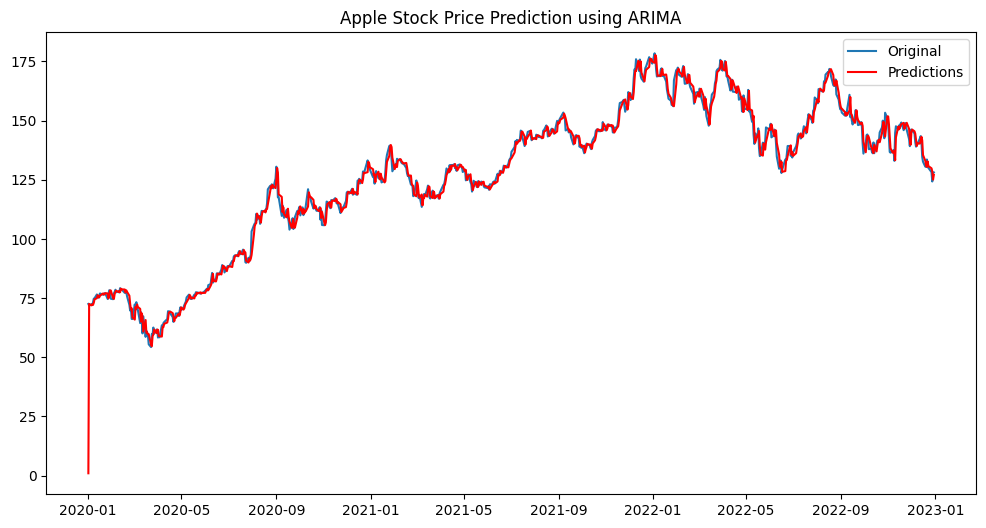

In [18]:
# plot the original data and the predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original')
plt.plot(np.exp(predictions), label='Predictions', color='red')
plt.title('Apple Stock Price Prediction using ARIMA')
plt.legend()
plt.show()

In [19]:
# Linear Regression Model

x = df['Close'].index.map(datetime.datetime.toordinal).values.reshape(-1, 1)
y = df['Close'].values

In [20]:
# splitting data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [21]:
# create a linear regression model object and fit the model using the training sets
regressor = LinearRegression()
regressor.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


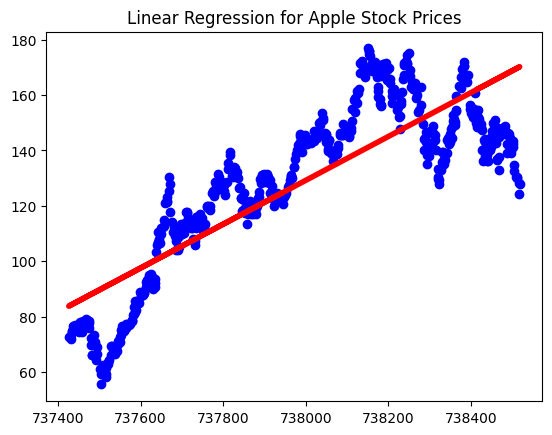

In [24]:
# paint the regresson line

plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, regressor.predict(x_train), color='red', linewidth=4)
plt.title('Linear Regression for Apple Stock Prices')
plt.show()